In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('generated_data.csv')

In [4]:
data.tail()

,orphan,social_category,minority_group,bpl_beneficiary,ews_group,cwsn,mother's_occupation,father's_occupation,mother's_qualification,father's_qualification,...,debt,mental_issues,results_in_previous_year_type,status_in_previous_year,dropout_student,age_group,district,gender,label,dropout
66,1,3,3,1,0,0,0,0,0,0,...,0,0,1,4,1,4,14,0,NaN,NaN
67,1,1,1,1,0,0,0,0,0,0,...,0,0,4,4,1,4,25,0,NaN,NaN
68,1,2,2,0,0,0,0,0,0,0,...,0,0,4,4,1,4,26,0,NaN,NaN
69,1,3,5,1,0,1,0,0,0,0,...,0,0,4,4,0,1,32,1,NaN,NaN
70,1,1,6,0,1,0,0,0,0,0,...,0,0,1,1,0,4,14,1,NaN,NaN


In [5]:
data.describe()

,orphan,social_category,minority_group,bpl_beneficiary,ews_group,cwsn,mother's_occupation,father's_occupation,mother's_qualification,father's_qualification,...,debt,mental_issues,results_in_previous_year_type,status_in_previous_year,dropout_student,age_group,district,gender,label,dropout
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,...,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,0.0,0.0
mean,0.323944,2.647887,4.352113,0.450704,0.366197,0.267606,0.436620,0.323944,0.859155,1.126761,...,0.225352,0.211268,1.859155,2.028169,0.253521,2.422535,13.661972,0.450704,NaN,NaN
std,0.471310,1.056931,2.432510,0.501105,0.485193,0.445862,0.499497,0.471310,1.233992,1.423573,...,0.420788,0.411113,1.112215,1.194892,0.438123,1.420885,9.619836,0.501105,NaN,NaN
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,4.000000,0.000000,NaN,NaN
50%,0.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,2.000000,2.000000,0.000000,3.000000,14.000000,0.000000,NaN,NaN
75%,1.000000,4.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.500000,2.000000,...,0.000000,0.000000,2.000000,3.000000,0.500000,3.000000,21.000000,1.000000,NaN,NaN
max,1.000000,4.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,5.000000,...,1.000000,1.000000,4.000000,4.000000,1.000000,5.000000,33.000000,1.000000,NaN,NaN


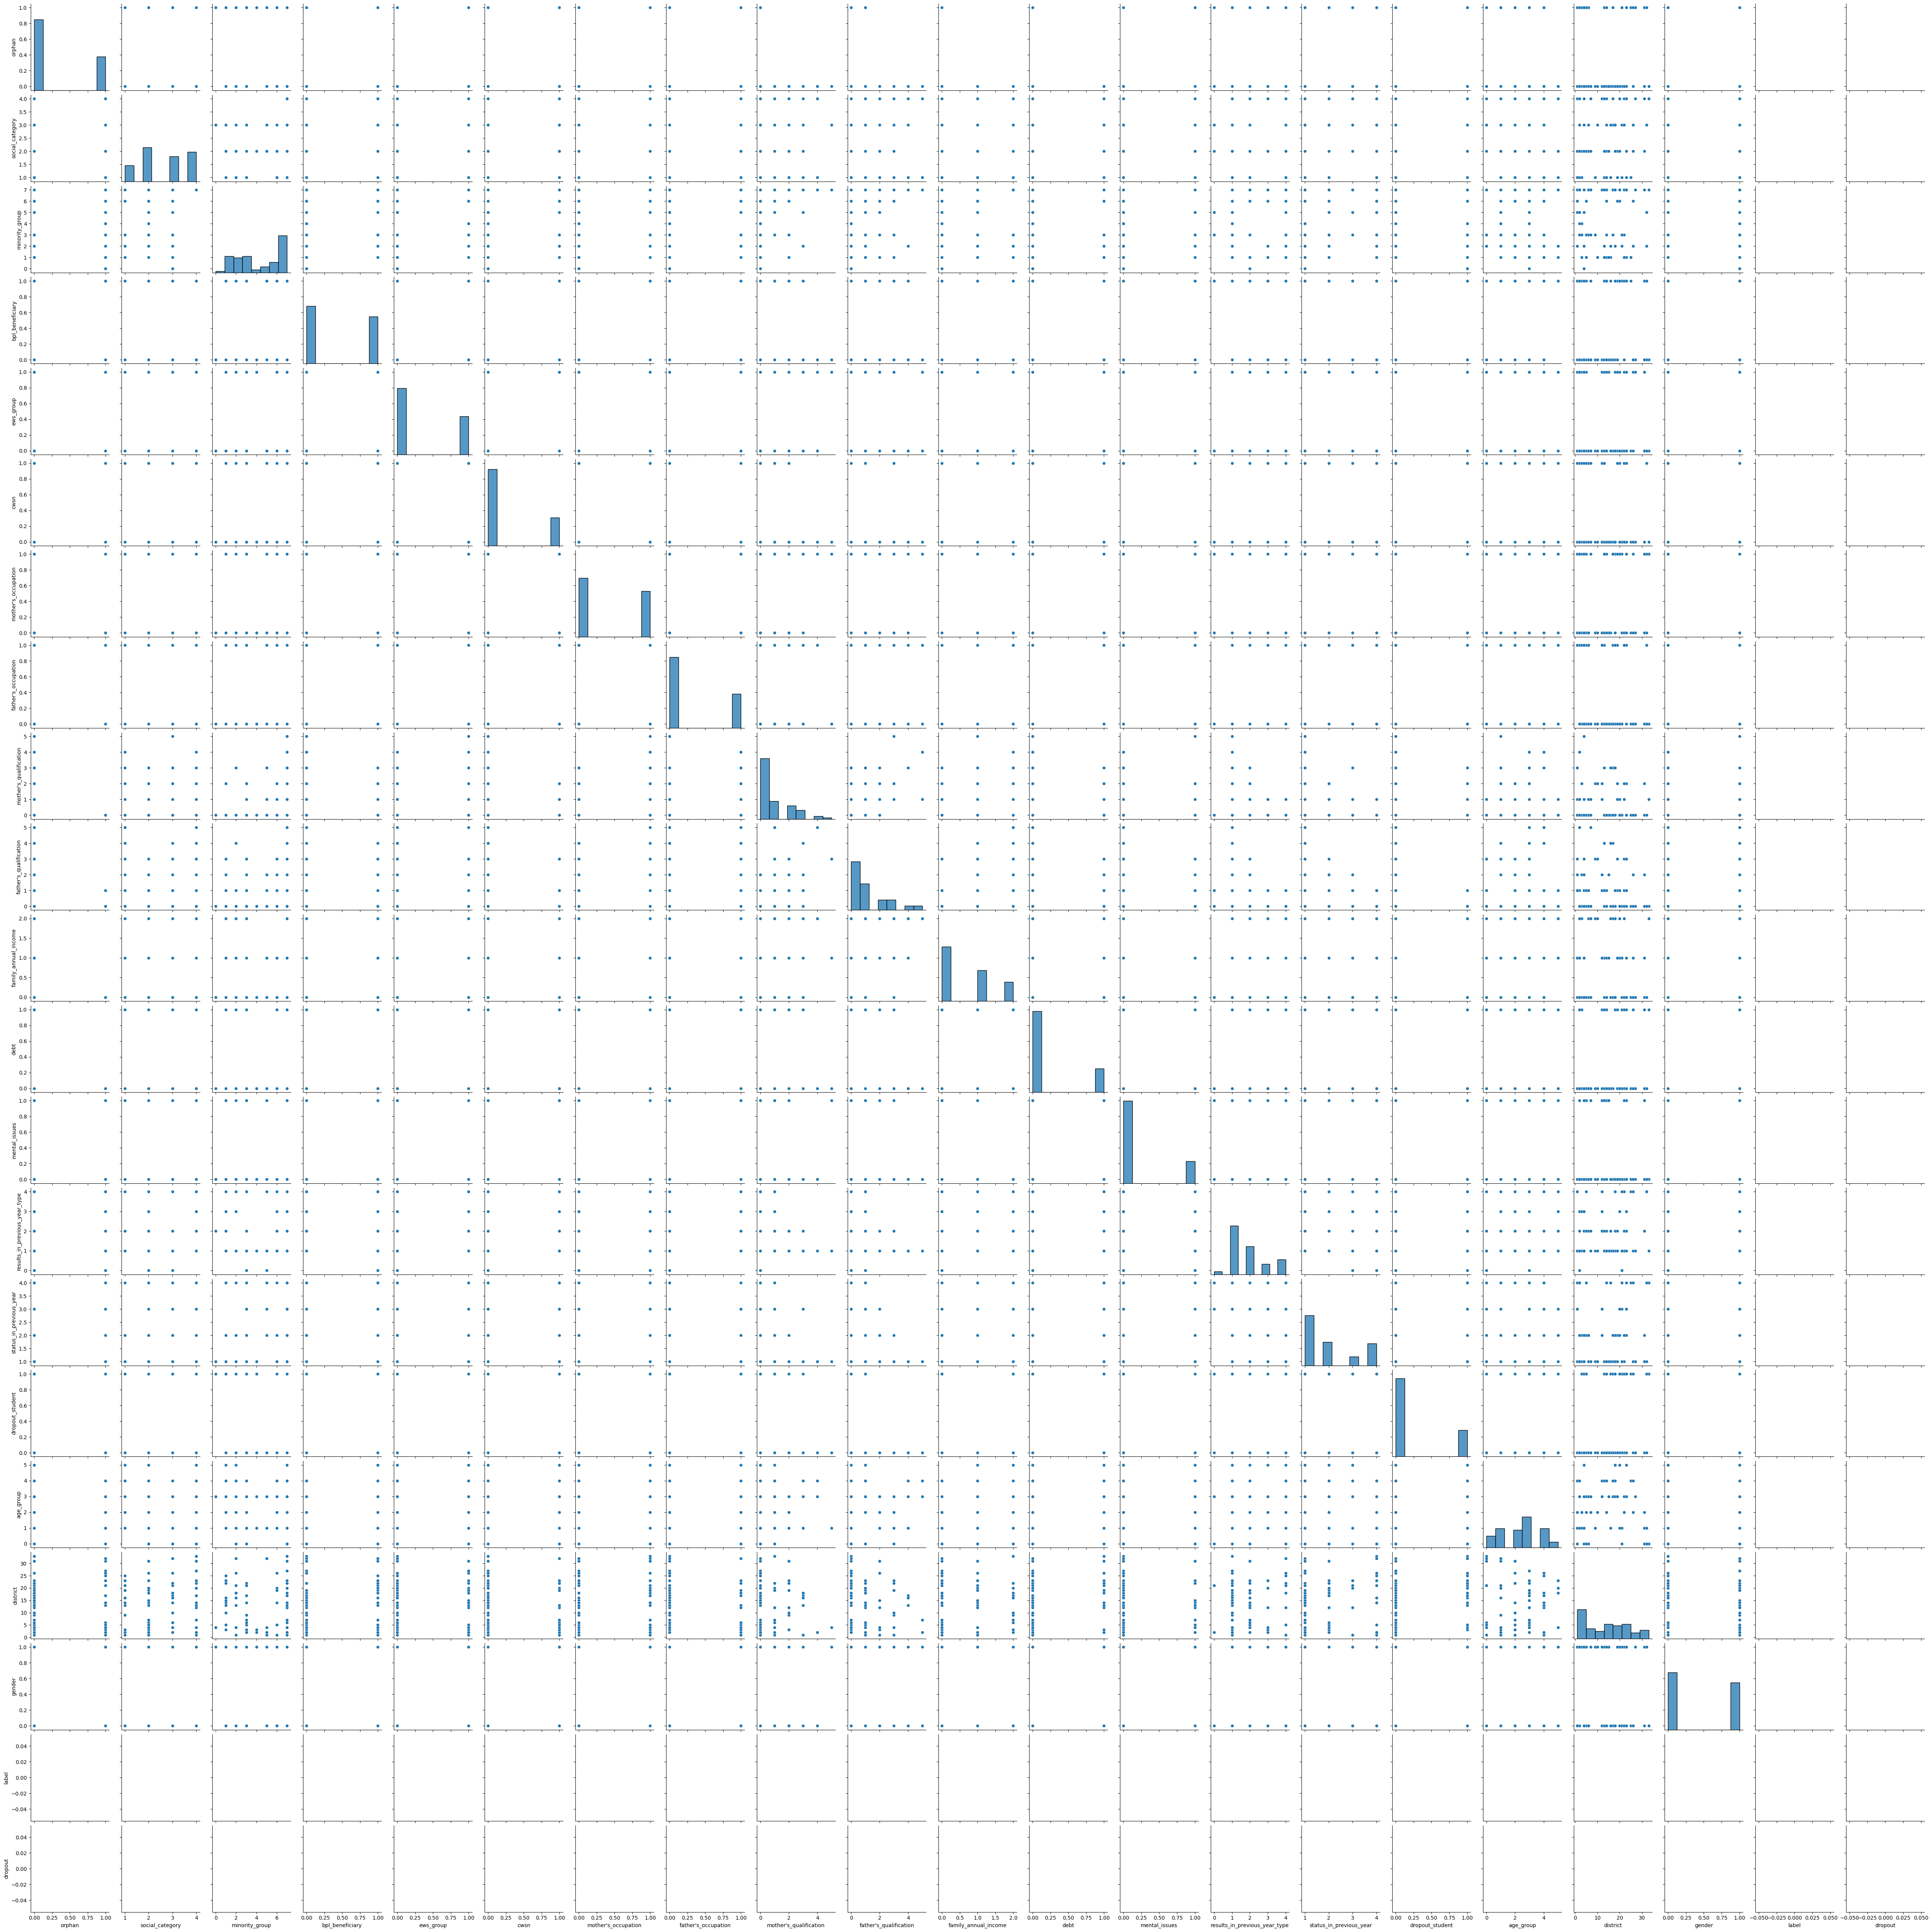

In [6]:
sns.pairplot(data)

In [7]:
data["label"]= 0
count= 0
Data_for_the_label = []
for i in range(len(data)):
    if data['orphan'][i] == 1:
        count+=1
    if data['social_category'][i] >=1:
        count+=1
    if data['minority_group'][i] >=1:
        count+=1
    if data['bpl_beneficiary'][i] ==1:
        count+=1
    if data['ews_group'][i] ==1:
        count+=1
    if data['cwsn'][i] == 1:
        count+=1
    if data["mother's_occupation"][i] == 1:
        count+=1
    if data["father's_occupation"][i] == 1:
        count+=1
    if data["debt"][i] == 1:
        count+=1
    if data['mental_issues'][i] == 1:
        count+=1
    if data['results_in_previous_year_type'][i] >= 1:
        count+=1
    if data['status_in_previous_year'][i] >= 1:
        count+=1
    if data['dropout_student'][i] == 1:
        count +=1
    Data_for_the_label.append(count)
    count=0

In [8]:
data['label']=Data_for_the_label

<AxesSubplot: >

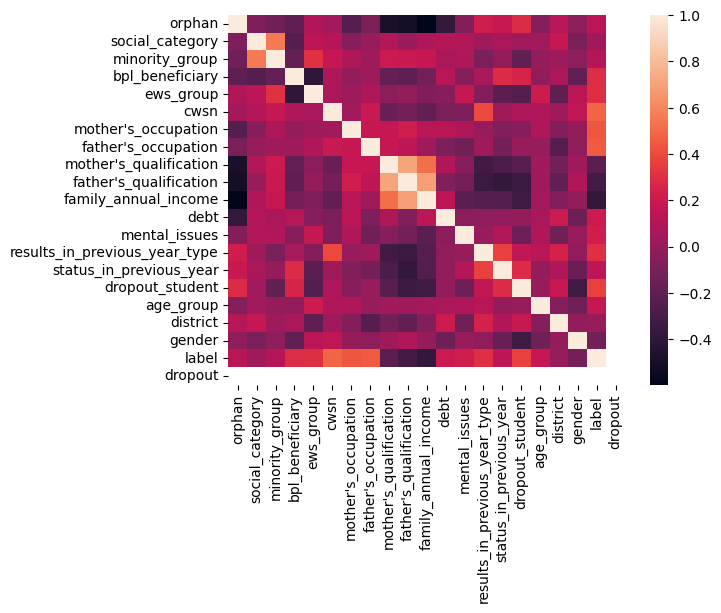

In [9]:
sns.heatmap(data.corr())

<AxesSubplot: >

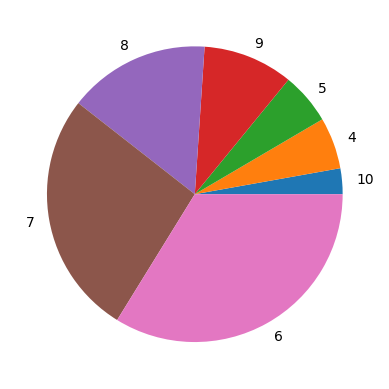

In [10]:
data.groupby('label').size().sort_values(ascending=True).plot(kind='pie' )

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
data.columns

Index(['orphan', 'social_category', 'minority_group', 'bpl_beneficiary',
       'ews_group', 'cwsn', 'mother's_occupation', 'father's_occupation',
       'mother's_qualification', 'father's_qualification',
       'family_annual_income', 'debt', 'mental_issues',
       'results_in_previous_year_type', 'status_in_previous_year',
       'dropout_student', 'age_group', 'district', 'gender', 'label',
       'dropout'],
      dtype='object')

In [13]:
x = data.drop(columns=["mother's_qualification", "father's_qualification", 
'family_annual_income' , 'age_group', 'district', 'gender', 'label',
       'dropout'])  # dependant variable
y = data['label']  # Target

In [14]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.4 , random_state=3)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(x_train, y_train)

LinearRegression()

In [18]:
print(lm.intercept_)  # co-efficient

3.911322342923875


In [19]:
lm.coef_

array([ 0.97277147, -0.04214084,  0.00756436,  1.03320929,  1.08386558,
        1.0128623 ,  0.92580226,  1.10309028,  1.01495747,  0.92590381,
        0.05836266, -0.00483426,  0.9358287 ])

In [20]:
x_train.columns

Index(['orphan', 'social_category', 'minority_group', 'bpl_beneficiary',
       'ews_group', 'cwsn', 'mother's_occupation', 'father's_occupation',
       'debt', 'mental_issues', 'results_in_previous_year_type',
       'status_in_previous_year', 'dropout_student'],
      dtype='object')

In [21]:
coff_data = pd.DataFrame(lm.coef_,x.columns , columns=['coeff'])

In [22]:
from sklearn.datasets import load_boston

In [23]:
boston = load_boston()

C:\Users\malan\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the

In [24]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [25]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [26]:
predictions = lm.predict(x_test)

In [27]:
predictions

array([10.07414202,  6.82695038,  4.77504014,  9.0238565 ,  5.87813043,
        6.99994045,  9.1849323 ,  5.84836027,  6.14732759,  5.94477046,
        6.90843968,  5.89790281,  6.73489957,  7.05567827,  7.08841854,
        6.91893254,  6.98376063,  7.90613218,  6.71132354,  3.85355693,
        4.77504014,  3.91355659,  5.90587493,  9.75616437,  8.08226533,
        5.98071805,  7.99608508,  6.07413819,  7.78526423])

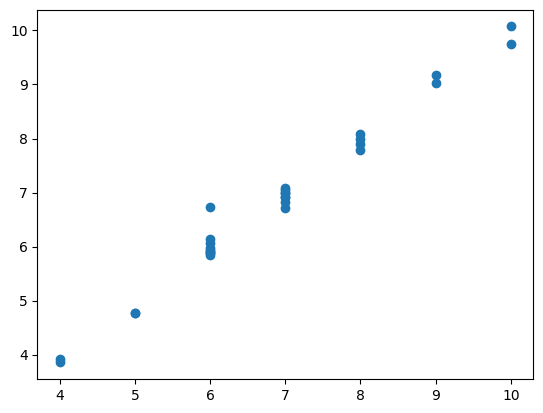

In [28]:
plt.scatter(y_test ,predictions)

C:\Users\malan\AppData\Local\Temp\ipykernel_22044\202957839.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - predictions))


<AxesSubplot: xlabel='label', ylabel='Density'>

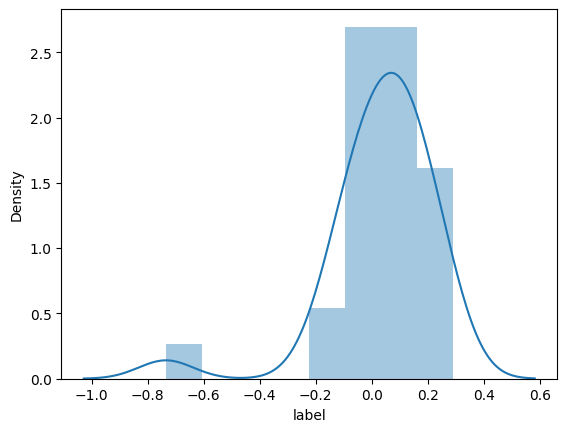

In [29]:
sns.distplot((y_test - predictions))

In [1]:
from sklearn import metrics

In [31]:
metrics.mean_absolute_error(y_test , predictions)

0.1344729126217542

In [32]:
metrics.mean_squared_error(y_test , predictions)

0.03651062191826272

In [33]:
np.sqrt(metrics.mean_squared_error(y_test , predictions))

0.1910775285538902

In [34]:
# cost function use and fradient Descent algo

In [42]:
def Gradient_descent(x , y):
    m_curr = b_curr = 0
    rate = 0.01 # alpha
    n = len(x)
    plt.scatter(x,y , color = 'Blue' ,marker='+' , linewidths=5)
    
    for i in range(1000):
        y_pred = m_curr * x + b_curr
        plt.plot(x,y_pred , color='black')
        md= -(2/n)*sum(x*(y-y_pred))
        yd = -(2/n)*sum(y-y_pred)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

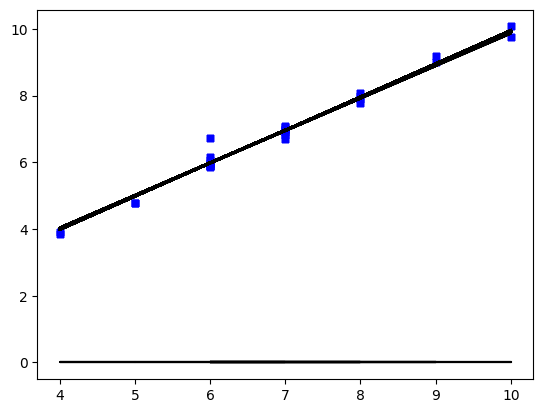

In [43]:
Gradient_descent(y_test,predictions)